# <center> Bank Customer Churn Prediction <center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                       
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('./Customer-Churn-Records.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df['CustomerId'].nunique()
#the CustomerId is unique to each observation

10000

Surname, CustomerID do not provide any clues in churning so they should be dropped. 

In [7]:
df.drop(columns = ['Surname', 'CustomerId','RowNumber'], inplace = True)


#  Exploratory Data Analysis 

### Univariate Analysis - Examing distribution and outliers

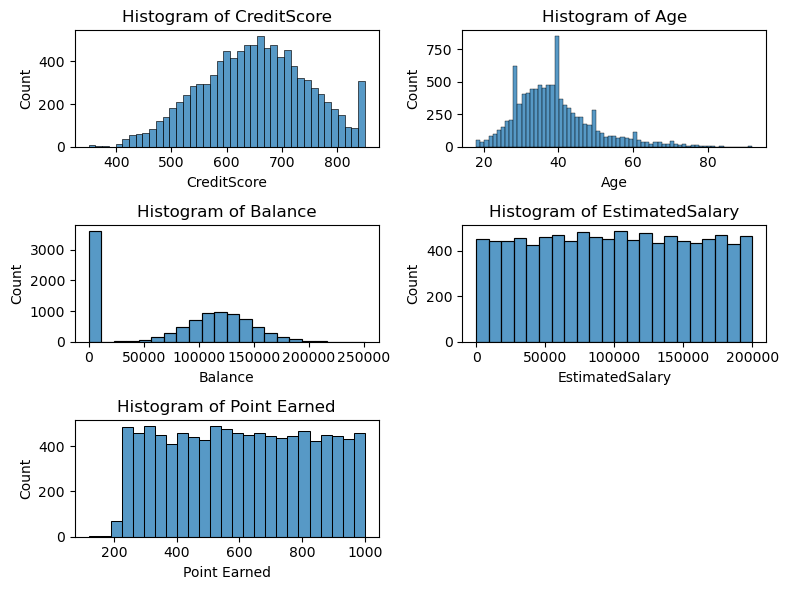

In [8]:
var = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

fig, axes = plt.subplots(3, 2, figsize=(8, 6))

axes = axes.flatten()

for i, col in enumerate(var):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

if len(var) < len(axes):
    for j in range(len(var), len(axes)):
        fig.delaxes(axes[j])    
    
plt.tight_layout()
plt.show()

In [9]:
df[var].describe()

,CreditScore,Age,Balance,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,250898.090000,199992.480000,1000.000000


Looking at the distribution of all continous variables, credit score and age of customers are mostly normal distributed. In term of account balance, there is a significant proportion of customers with balance of \\$0. The variation in estimated salaries span evenly across the range of \\$ 0 to $ 200,000, and the points earned show a distributed range between 200 and 1000. 


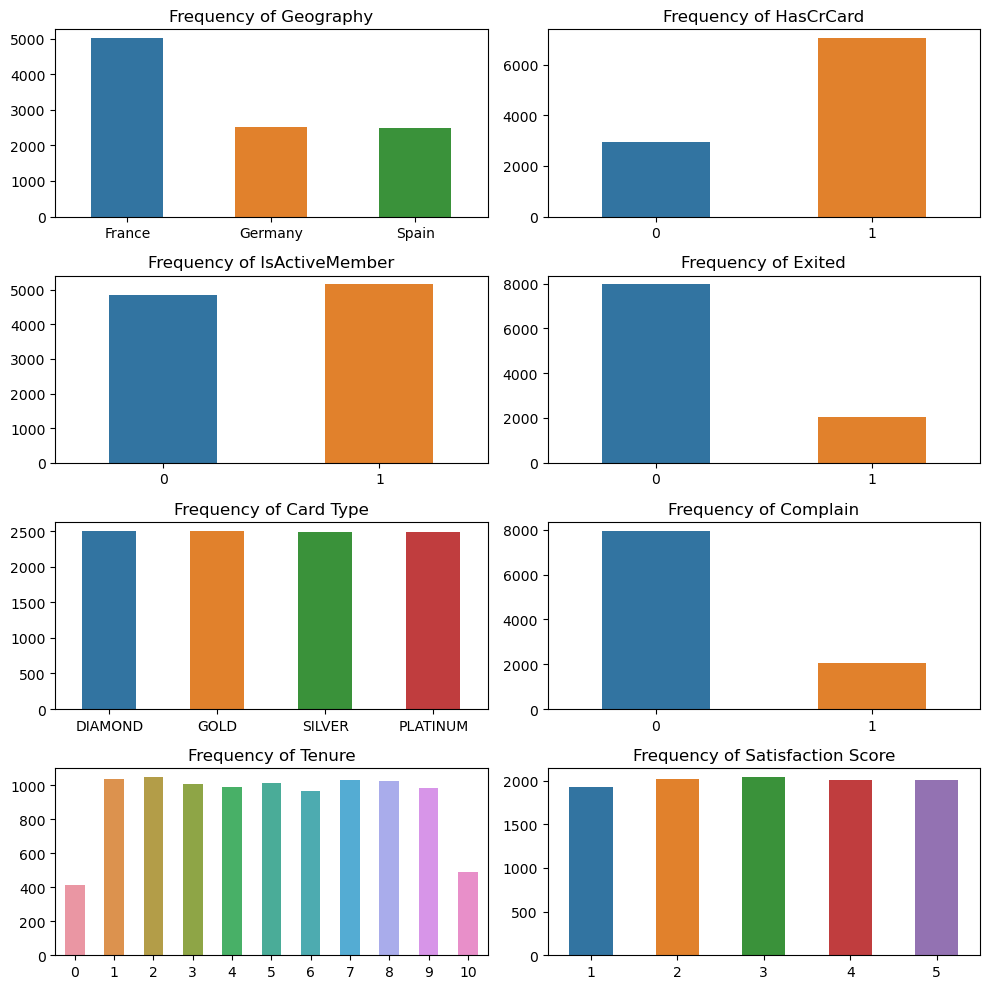

In [10]:
var = ['Geography', 'HasCrCard', 'IsActiveMember', 'Exited', 'Card Type', 'Complain','Tenure','Satisfaction Score']

fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(var):
    col_val_cnt = df[col].value_counts()
    sns.barplot(x=col_val_cnt.index, y=col_val_cnt.values, ax=axes[i], width = 0.5)
    axes[i].set_title(f"Frequency of {col}")


if len(var) < len(axes):
    for j in range(len(var), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most customers have remained with the bank, although only half of them are active members. A significant portion of customers in the dataset are from France and the rest are from Germany and Spain.  The majority of the customers had at least one credit card. Most customers have tenures between 1 to 9 years. The majority of customers did not report any complain. Within those that had complian, there is a equally mixed groups of scores on customers' satisfaction for their complaint resolution.

### Bivariate Analysis - Relationship between features and target variable : Exited 

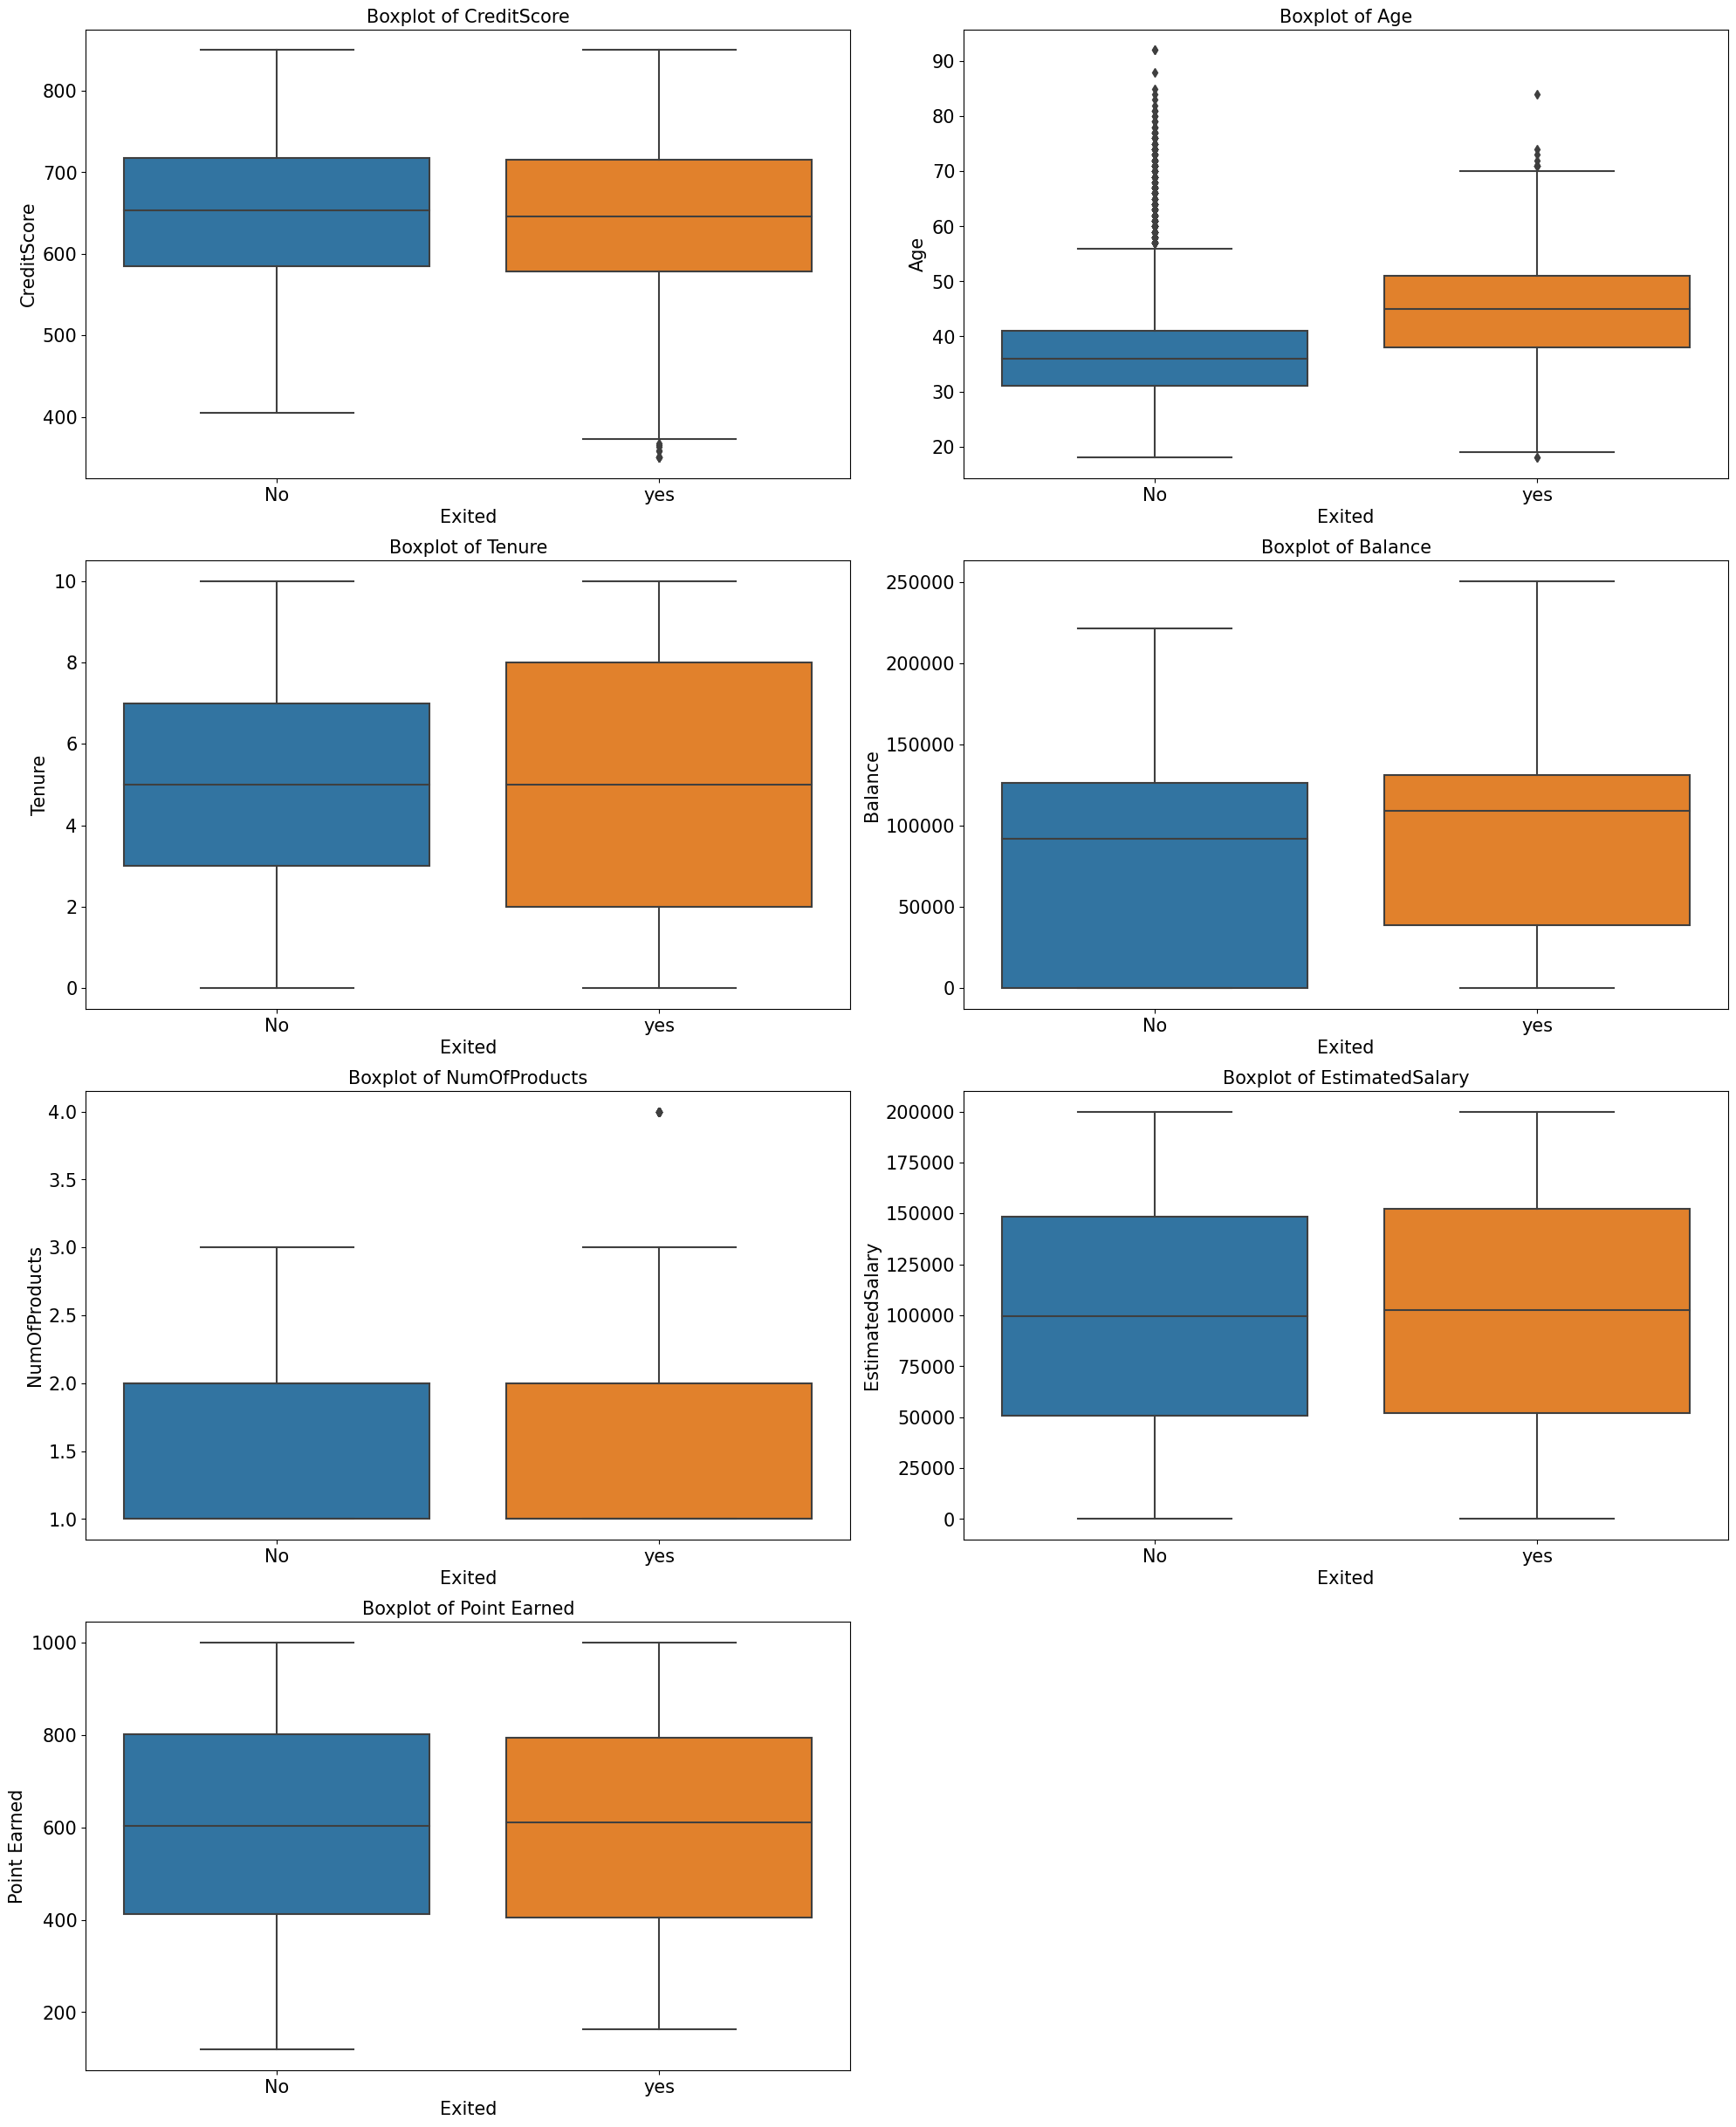

In [11]:
variables = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,30))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(x = 'Exited', y = var, data = df, ax= axes[i])
    axes[i].set_title(f'Boxplot of {var}', fontsize = 15)
    axes[i].set_xticklabels(['No','yes'], fontsize = 15)
    axes[i].tick_params(axis = 'y', labelsize = 15)
    axes[i].set_xlabel('Exited',fontsize = 15)
    axes[i].set_ylabel(var, fontsize = 15)

if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])
        
plt.tight_layout()

plt.show()
                      

The churned group comprises older customers with a wider range and narrower balance range. No significant differences are observed in credit score, number of products, estimated salary or points earned. 

In [12]:
def stackplot(x, y=None):

    ex_cc = df.groupby('Exited')[x].value_counts().unstack()
    row_sums = ex_cc.sum(axis = 1)
    ex_cc_pct = ex_cc.divide(row_sums, axis = 0) * 100

    ax = ex_cc_pct.plot.bar(stacked=True,figsize=(5,3),rot = 0, width = 0.2)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(f'% Customers')
    ax.set_xlabel('Exited Customers')
    ax.set_xticklabels(['No','Yes'], rotation = 'horizontal')

    if y:
        legend_labels = y
        plt.legend(labels=legend_labels)


    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 9)

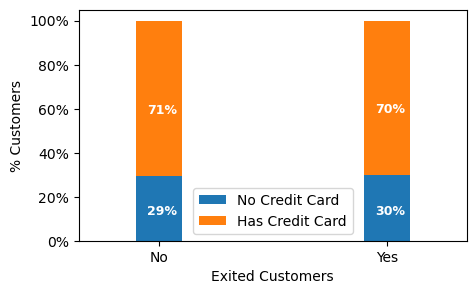

In [13]:
stackplot('HasCrCard', ['No Credit Card', 'Has Credit Card'])

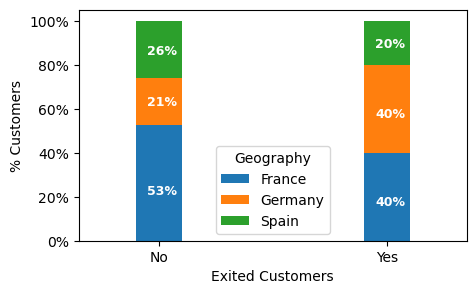

In [14]:
stackplot('Geography')

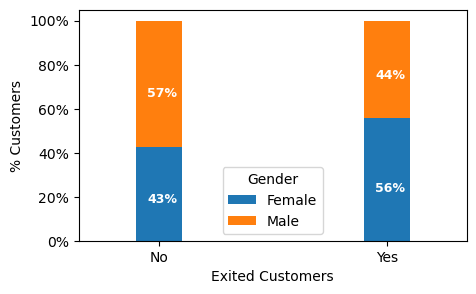

In [15]:
stackplot('Gender')

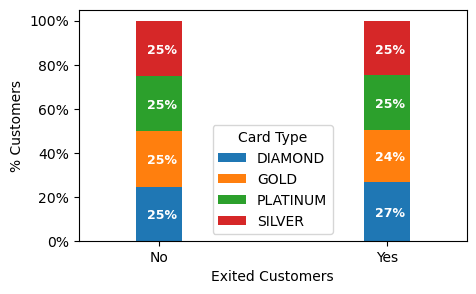

In [16]:
stackplot('Card Type')

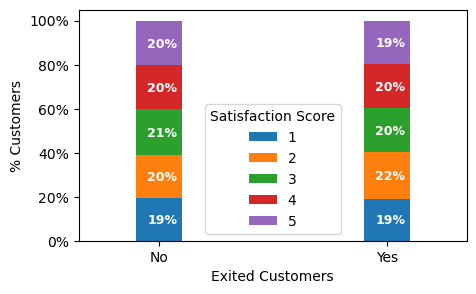

In [17]:
stackplot('Satisfaction Score')

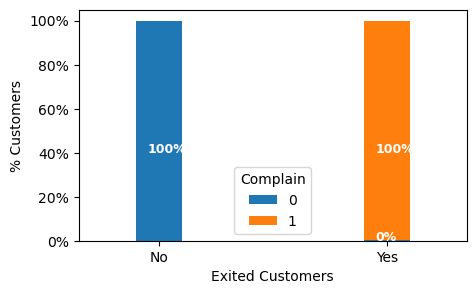

In [18]:
stackplot('Complain')

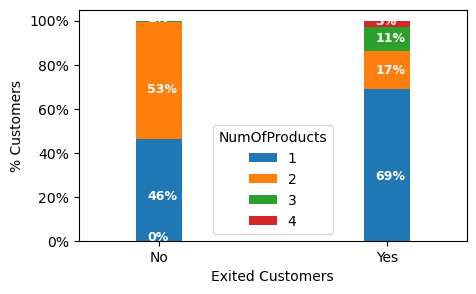

In [19]:
stackplot('NumOfProducts')

All customers in the churned group had reported complains while customers in retained group did not report any. Within the churned group, there is a noticeable increase in the proportion of customers from Germany, rising from 21% to 40% when comparing to the retained group. Additionally, the percentage of female customers in the churned group increase from 43% to 56%. A big increase in percentage of customers having one product and moderate increase in those having two or three products. in the churned group. Having a credit card, the card type and satisfaction score do not apear to have any significant impact on the ratio of churned to retained customers. 

### Correlation Analysis

In [20]:
#Geography,gender and card type need to be converted into dummy variables before analysis. 
df_dummies = pd.get_dummies(df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  uint8  
 13  Geography_Germany   10000 non-null  uint8  
 14  Geography_Spain     10000 non-null  uint8  
 15  Gender_Female       10000 non-null  uint8  
 16  Gende

<Axes: >

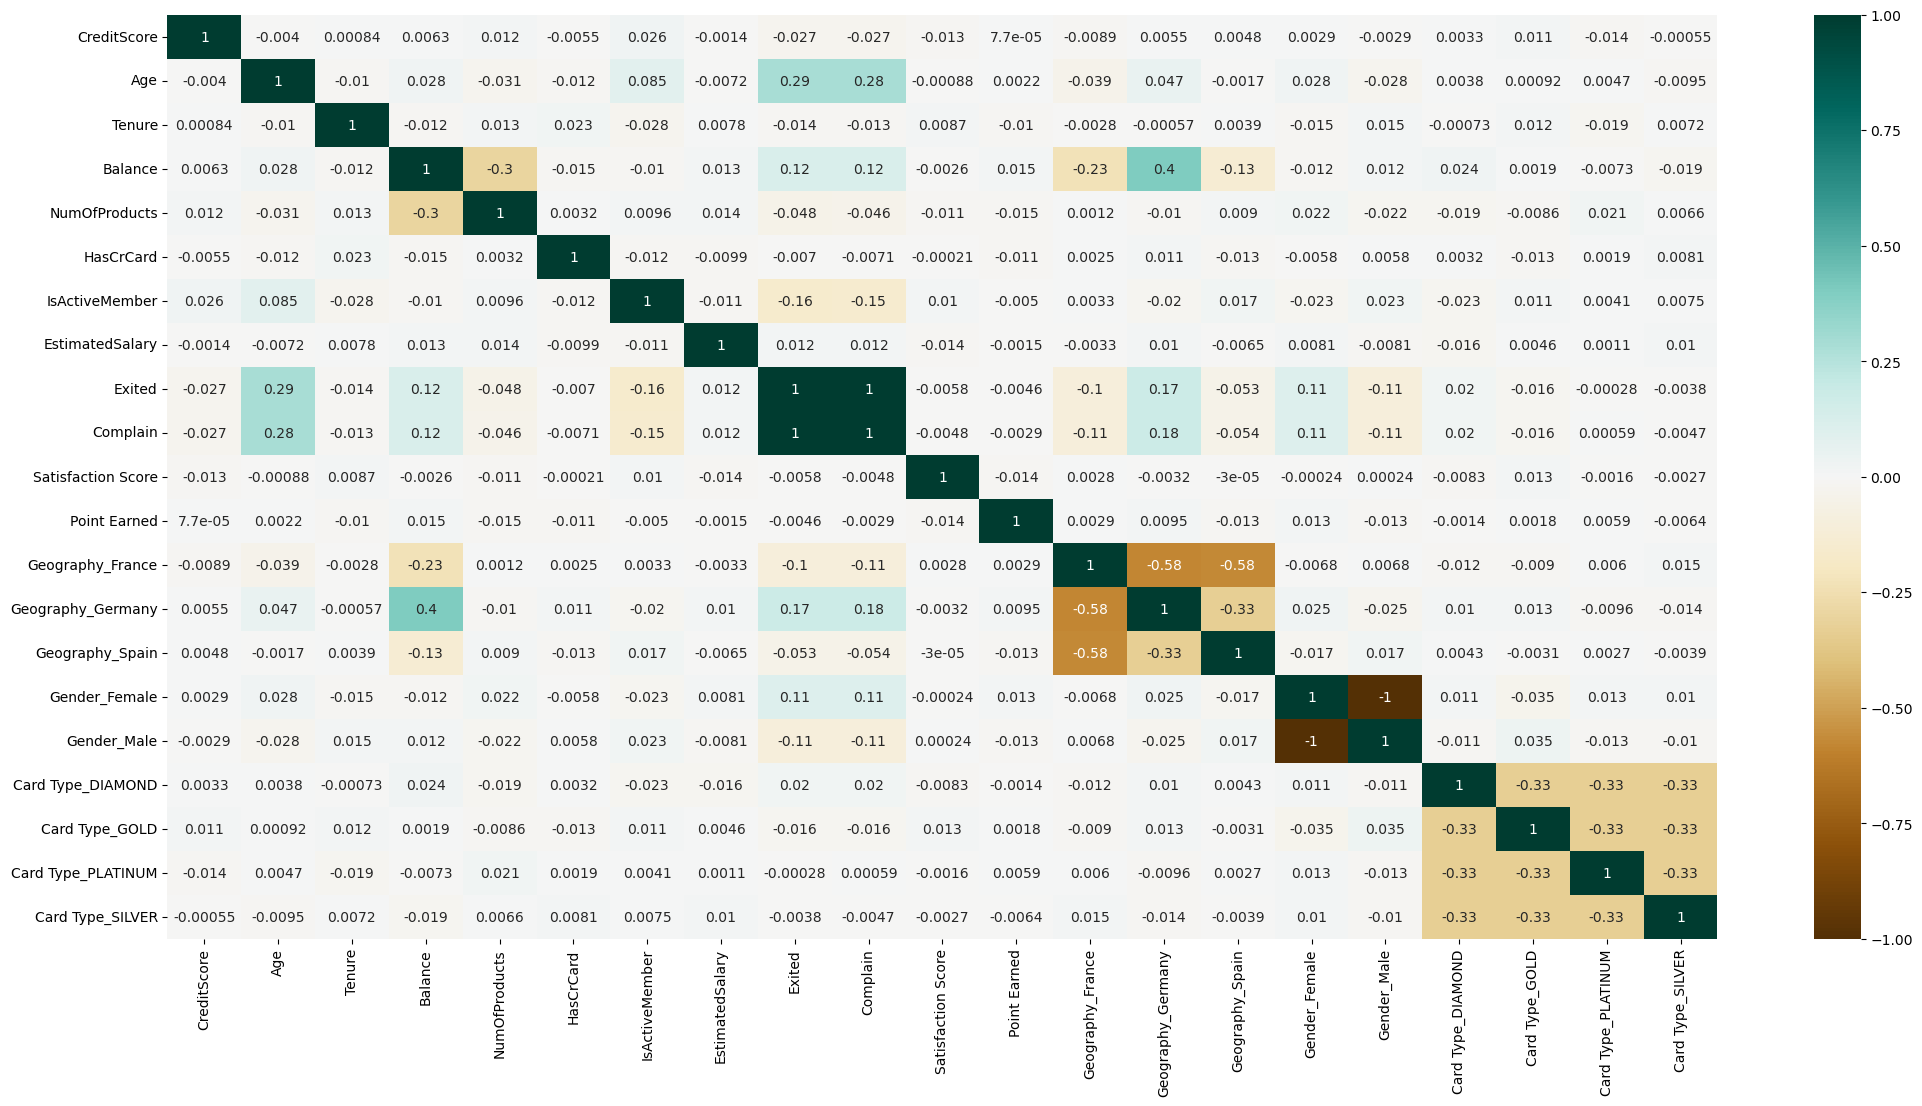

In [21]:
plt.figure(figsize = (25,12))
corr = df_dummies.corr()
sns.heatmap(corr, cmap = 'BrBG', annot = True)

Churning (Exited) is perfectly positively correlated with complain and slighly with age and location as Germany. These findings are consistent with the insights from EDA. Interestingly, churning is negatively correlated with active membership status. In addtions, number of products is slightly negatively correlated with balance. 

The variable 'complain' needs to be dropped when building a model because it is likely to introduce overfitting due to perfect correlation.

In [22]:
df_dummies.drop(columns = 'Complain', inplace = True)

### EDA Key Takeaways
- A siginicant proportion of customers a have zero balance
- While a majority of customers have remained with the bank, only half of them are active members
- Customers in the churned group tend to be older, female, from Germany, and/or having diversed compositions in number of products they owned. 
- All customers who left had previously reported complains


# Predictive Modeling

We will run three models: Logistic Regression, K nearest Neighbor and XGBoost, to predict whether the customers have left the bank. 

In [23]:
X = df_dummies.drop(columns = 'Exited')
y = df_dummies['Exited'].values

# scale the dataset
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# split the dataset into training and testing set
# testing set accounting for 30% of the original data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

### Logistic Regression

In [24]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

Weights will be applied on the minority class to reduce the effect of imbalanced classes. 

In [25]:
df_dummies['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [26]:
7962/2038

3.9067713444553482

In [27]:
grid = {'solver' : ['newton-cg','lbfgs','liblinear'], 'penalty' : ['l2'], 'C' : [0.01, 0.1, 1.0, 10, 100]}
logreg = LogisticRegression(class_weight = {0: 1, 1:3.9})
logreg_cv = GridSearchCV(logreg, grid, cv = 10)

In [28]:
logreg_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 1, 1: 3.9}),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [29]:
log_reg_best_es = logreg_cv.best_estimator_

In [30]:
log_reg_best_es.fit(X_test, y_test)

LogisticRegression(C=10, class_weight={0: 1, 1: 3.9}, solver='newton-cg')

In [31]:
y_pred = log_reg_best_es.predict(X_test)

In [32]:
roc_auc_score(y_test, y_pred)

0.6929720063240058

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2396
           1       0.38      0.66      0.48       604

    accuracy                           0.71      3000
   macro avg       0.64      0.69      0.64      3000
weighted avg       0.79      0.71      0.73      3000



### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier


In [35]:
neighbors = range(1, 20 ,2)

train_acc = []
test_acc = []

for n in neighbors:
    print (f"Working on my model with {n} neighbors...", end = "\r")
    
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train, y_train)
    
    #Score the model on the test set
    train_accuracy = KNN_model.score(X_train, y_train)
    test_accuracy  = KNN_model.score(X_test, y_test)
    
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    

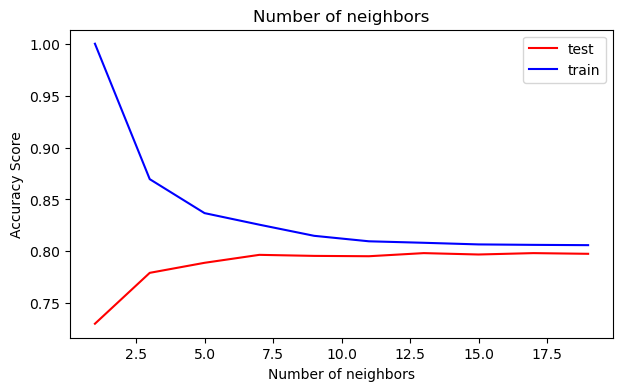

In [36]:
plt.figure(figsize = (7, 4))
plt.plot(neighbors, test_acc, color = 'red', label = 'test')
plt.plot(neighbors, train_acc, color = 'blue', label = 'train')
plt.ylabel('Accuracy Score')
plt.xlabel('Number of neighbors')
plt.title('Number of neighbors')
plt.legend()
plt.show()

Based on the elbow method, the optimal number of neigbors is 7. 

In [37]:
KNN_model = KNeighborsClassifier(n_neighbors = 7)

In [38]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred = KNN_model.predict(X_test)

In [40]:
roc_auc_score(y_test, y_pred)

0.5427063870247322

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2396
           1       0.48      0.12      0.19       604

    accuracy                           0.80      3000
   macro avg       0.65      0.54      0.54      3000
weighted avg       0.75      0.80      0.74      3000



### XGBOOST

In [42]:
from xgboost import XGBClassifier

In [43]:
class_ratio = 7962/2038

In [44]:
estimator = XGBClassifier(
    objective = 'binary:logistic',
    nthread = 4,
    seed = 1234,
    scale_pos_weight = class_ratio)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators' : range (60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'roc_auc',
    cv = 10, 
    verbose = True)

In [45]:
grid_search.fit(X,y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [46]:
xgb = grid_search.best_estimator_

In [47]:
y_pred = xgb.predict(X_test)

In [48]:
roc_auc_score(y_test, y_pred)

0.804995080100388

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      2396
           1       0.54      0.77      0.64       604

    accuracy                           0.82      3000
   macro avg       0.74      0.80      0.76      3000
weighted avg       0.86      0.82      0.83      3000



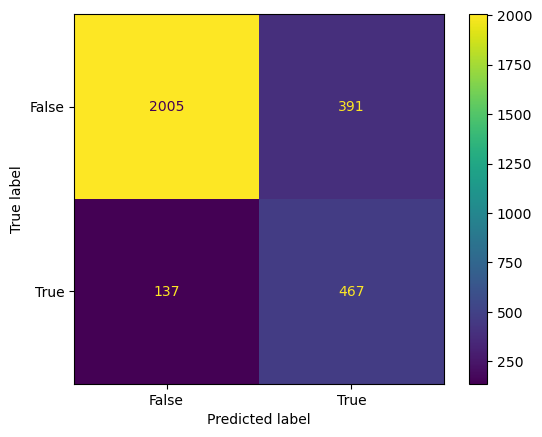

In [50]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

XGBoost stands out with the highest roc_auc_score of 80% and accuracy of 82% compared to the other two models trained for predicting churn. It's worth noting that precision and recall often invovle a trade-off. If the goal is to proactively retain customers before they churn, capturing as many potential churn customers as possible become crucial. Hence, achieving a high recall outweighs having a high precision. In the XGboost model, it achieves a recall of 77%, indicating that it successfully identifies 77% of  604 customers who have left in our testing set. 

By leveraging this model, the bank can effectively identify customers who are at risk of churning and implement targeted strategies. These strategies include reaching out with customized offers, introducing new services and providing valuable financial education and guidance. This machine learning approach not only optimizes resources by focusing efforts on a smaller subset of customers who are more likely in the entire customer popualtion. 

Axes(0.125,0.11;0.775x0.77)


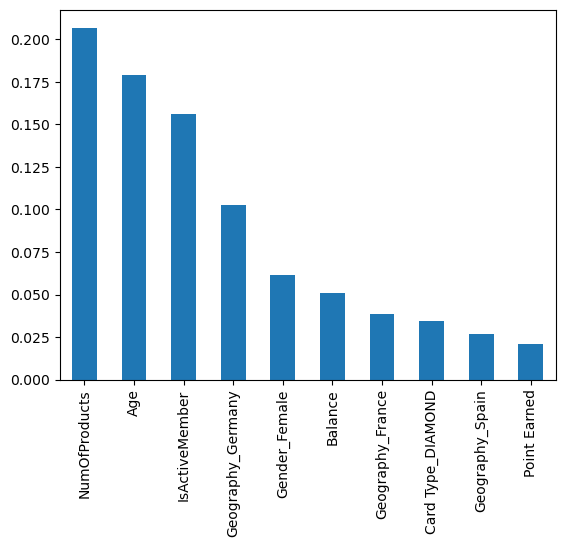

In [51]:
weights = pd.Series(xgb.feature_importances_,index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


The graph above illustrates the top 10 significant features identified by the XGBoost model for predicting churn. Among these features, the top 5 predictors are the number of products, age, active membership status, Germany as location and being female. These findings align with the insights derived from EDA, further reinforcing their validity and relevance in understanding churn behavior.

# Conclusion

- The number of products, age, active membershiping status, coming from Germany and/or being female are key predictors of churning 
- Complain was excluded as a predictor due to its exceptionally high correlation with the outcome variable.
- XGBoost model achieved roc_auc score of 80%, accuracy of 82% and recall of 77%
- The model identifies a subset of customers who are predicted to be at higher risk of churning among the entire customer population, enabling bank leadership to plan and implement strategies on this targeted group to improve the overall customer retention rate. 
